<a href="https://colab.research.google.com/github/YasirHabib/tensorflow/blob/master/celsius_fahrenheit_th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
import theano.tensor as T
import theano

In [0]:
x = np.array([-40, -10, 0, 8, 15, 22, 38])
y = np.array([-40, 14, 32, 46, 59, 72, 100])

n = len(x) # Number of data points

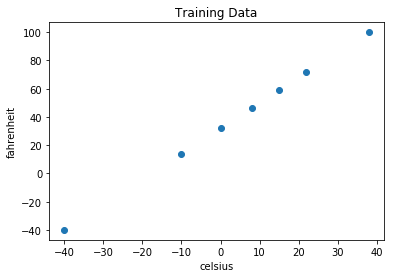

In [149]:
# Plot of Training Data 
plt.scatter(x, y) 
plt.xlabel("celsius") 
plt.ylabel("fahrenheit") 
plt.title("Training Data") 
plt.show()

In [0]:
X = T.vector('X')
Y = T.vector('Y')

In [0]:
W = theano.shared(np.random.randn(), 'W')
b = theano.shared(0., 'b')

In [0]:
learning_rate = 0.0015
training_epochs = 5000

# Hypothesis 
Ypred = X.dot(W) + b

# Mean Squared Error Cost Function
cost = T.sum(T.pow(Ypred-Y,2)) / (2 * n)

# Back propagation
update_W = W - learning_rate * T.grad(cost, W)
update_b = b - learning_rate * T.grad(cost, b)

In [0]:
optimizer = theano.function(inputs=[X, Y], outputs=cost, updates=[(W, update_W), (b, update_b)])

In [0]:
prediction = theano.function(inputs=[X], outputs=Ypred)

In [155]:
costs=[]
for epoch in range(training_epochs):
  c = optimizer(x, y)
    
  if (epoch+1) % 50 == 0:
    costs.append(c)
      
    print("Epoch", (epoch + 1), ": cost =", c, "W =", W.get_value(), "b =", b.get_value())
    
weight = W.get_value()
bias = b.get_value()

Epoch 50 : cost = 425.3878547460653 W = 2.0487748311065355 b = 2.2313609837210517
Epoch 100 : cost = 368.29225843044566 W = 2.031334317634651 b = 4.297944765601166
Epoch 150 : cost = 318.8606061428429 W = 2.0151064848470583 b = 6.220834026170524
Epoch 200 : cost = 276.06416638985297 W = 2.0000070121505344 b = 8.010020189747737
Epoch 250 : cost = 239.01229434489107 W = 1.985957441964713 b = 9.674799952981886
Epoch 300 : cost = 206.9338964697425 W = 1.9728847720527514 b = 11.223823590931765
Epoch 350 : cost = 179.16138314065566 W = 1.9607210761982283 b = 12.665139904307674
Epoch 400 : cost = 155.11677531403322 W = 1.9494031512572831 b = 14.006238041423861
Epoch 450 : cost = 134.29967609490794 W = 1.938872188752064 b = 15.254086412170386
Epoch 500 : cost = 116.27685688223237 W = 1.929073469299073 b = 16.415168896203276
Epoch 550 : cost = 100.67324136627388 W = 1.919956078284639 b = 17.495518533492532
Epoch 600 : cost = 87.16409974437782 W = 1.9114726413101568 b = 18.500748872285566
Epoch 

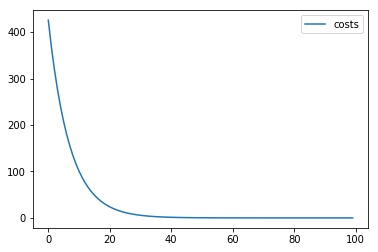

In [156]:
plt.plot(costs, label="costs")
plt.legend()

In [157]:
print(weight*100 + bias)
predictions = prediction(x)

211.74373971461742


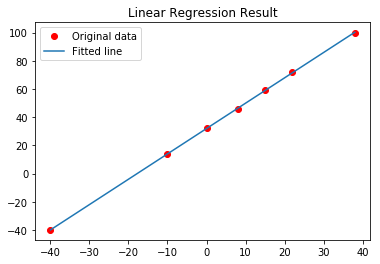

In [158]:

# Plotting the Results 
plt.plot(x, y, 'ro', label ="Original data") 
plt.plot(x, predictions, label ="Fitted line") 
plt.title("Linear Regression Result") 
plt.legend() 
plt.show()